# Projeto de Modelagem de Dados: **Análise da Qualidade de Vinho**🍷✨
---

### **Desenvolvido por:** <a href="https://github.com/Lucas-Siade">Lucas Lima Siade
### **Disciplina:** Laboratório de Inovação e Automação 1 (LIA 1)

Este projeto tem como objetivo a construção de um modelo preditivo para avaliar a qualidade do vinho através da análise de características físico-químicas, como acidez, teor alcoólico e concentração de sulfatos. 

<img src="vinho.jpg" alt="Imagem do Vinho" width="500" height="auto" />


---
## **1. Bibliotecas**

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

---
## **2. Dados**

O dataset utilizado neste projeto foi retirado do [Kaggle - Modeling Wine Dataset](https://www.kaggle.com/datasets/willianoliveiragibin/modeling-wine/data).

In [5]:
dataset = pd.read_csv('wine.csv')

display(dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,6,"R$ 45.512,00"
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,6,"R$ 45.421,00"
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,6,"R$ 45.301,00"
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,39.00,24.0,92.0,99.114,3.27,0.50,6,"R$ 45.333,00"
4894,6.6,0.32,0.36,8.0,47.00,57.0,168.0,9.949,3.15,0.46,5,"R$ 45.452,00"
4895,6.5,0.24,0.19,1.2,41.00,30.0,111.0,99.254,2.99,0.46,6,"R$ 45.391,00"
4896,5.5,0.29,0.30,1.1,22.00,20.0,110.0,98.869,3.34,0.38,7,"R$ 45.516,00"


---
## **3. Análise dos Dados**

In [7]:
display(dataset.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,11.216659,0.334192,6.391415,40.608069,35.308085,138.360657,113.540098,3.188267,0.489847,5.877909
std,0.843868,67.987301,0.121020,5.072058,24.967489,17.007137,42.498065,232.603169,0.151001,0.114126,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.020000,2.000000,9.000000,0.990000,2.720000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,33.000000,23.000000,108.000000,9.943000,3.090000,0.410000,5.000000
50%,6.800000,0.270000,0.320000,5.200000,41.000000,34.000000,134.000000,98.948500,3.180000,0.470000,6.000000
75%,7.300000,0.330000,0.390000,9.900000,48.000000,46.000000,167.000000,99.418000,3.280000,0.550000,6.000000
max,14.200000,965.000000,1.660000,65.800000,346.000000,289.000000,440.000000,999.000000,3.820000,1.080000,9.000000


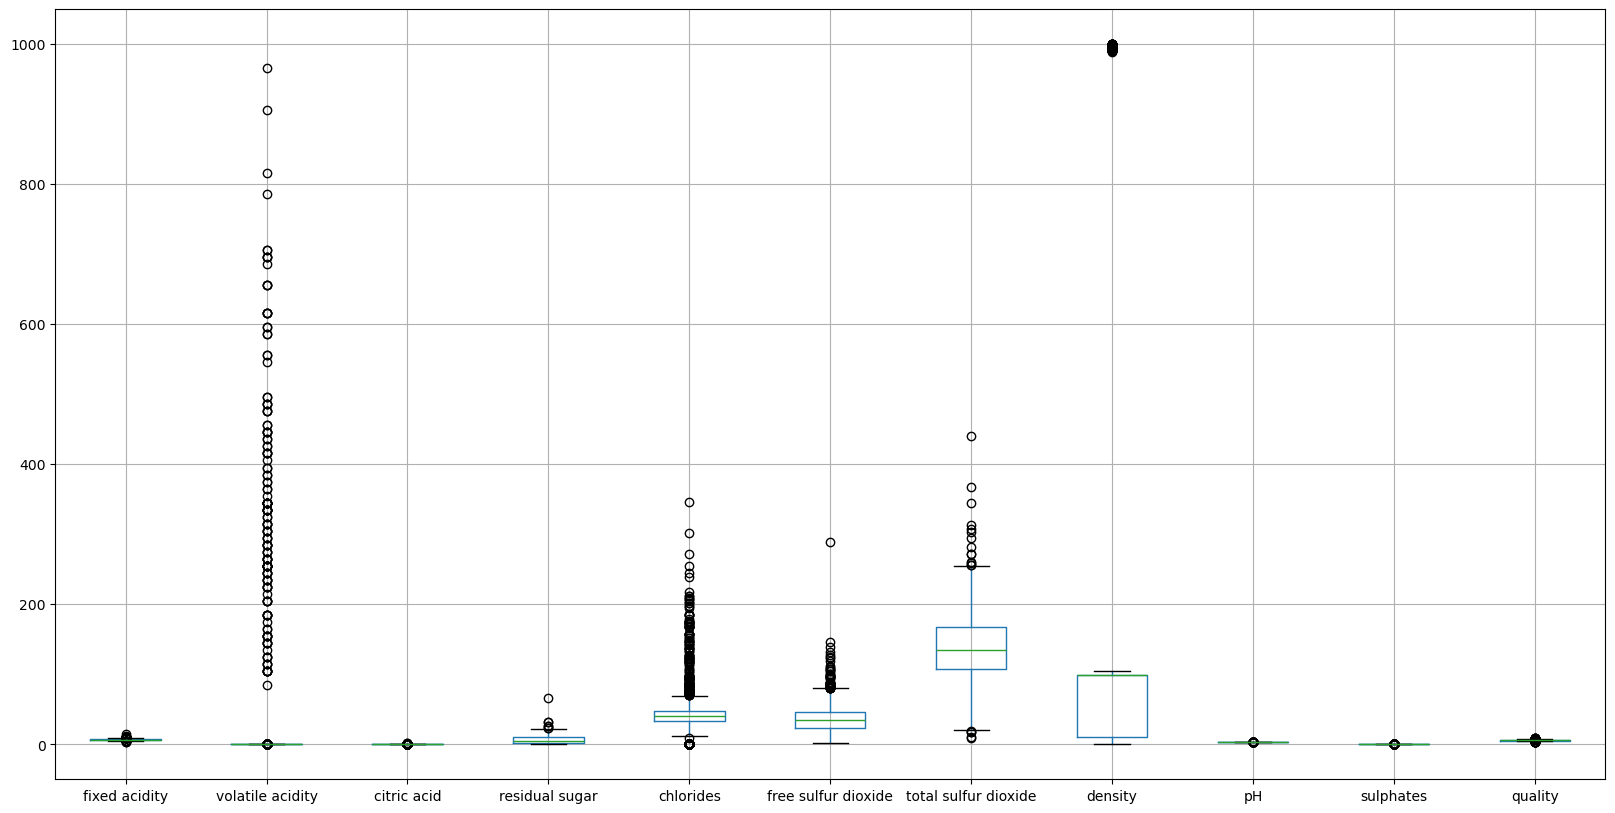

In [8]:
dataset.boxplot(figsize=(20,10))
plt.show()

---
## **4. Modelagem dos Dados**

### 4.1. Remover colunas que não serão utilizadas

In [11]:
datasetArrumado = dataset.drop(columns=["alcohol"])

### 4.2. Buscar valores nulos

In [13]:
idxNaN = pd.isnull(datasetArrumado).any(axis=1).to_numpy().nonzero()

if len(idxNaN) > 1:
    print('\nObjeto(s) com valores Nulos:')
    display(datasetArrumado.iloc[idxNaN])
else:
    print('Não existem objetos com valores nulos.')

Não existem objetos com valores nulos.


### 4.3. Buscar valores duplicados

In [15]:
datasetDuplicadas = datasetArrumado[datasetArrumado.duplicated(subset=[
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], keep=False)]

if len(datasetDuplicadas) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(datasetDuplicadas)
else:
    print('Não existem objetos redundantes e/ou inconsistentes.')


Objeto(s) redundante(s) e/ou inconsistente(s):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,6
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6
...,...,...,...,...,...,...,...,...,...,...,...
4855,7.1,0.23,0.39,13.7,58.00,26.0,172.0,99.755,2.90,0.46,6
4856,7.1,0.23,0.39,13.7,58.00,26.0,172.0,99.755,2.90,0.46,6
4879,6.6,0.34,0.40,8.1,46.00,68.0,170.0,99.494,3.15,0.50,6
4880,6.6,0.34,0.40,8.1,46.00,68.0,170.0,99.494,3.15,0.50,6


In [16]:
datasetArrumado = datasetArrumado.drop_duplicates(keep = 'first')

In [17]:
datasetDuplicadas = datasetArrumado[datasetArrumado.duplicated(subset=[
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], keep=False)]

if len(datasetDuplicadas) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(datasetDuplicadas)
else:
    print('Não existem objetos redundantes e/ou inconsistentes.')

Não existem objetos redundantes e/ou inconsistentes.


### 4.3. Remover Outliers

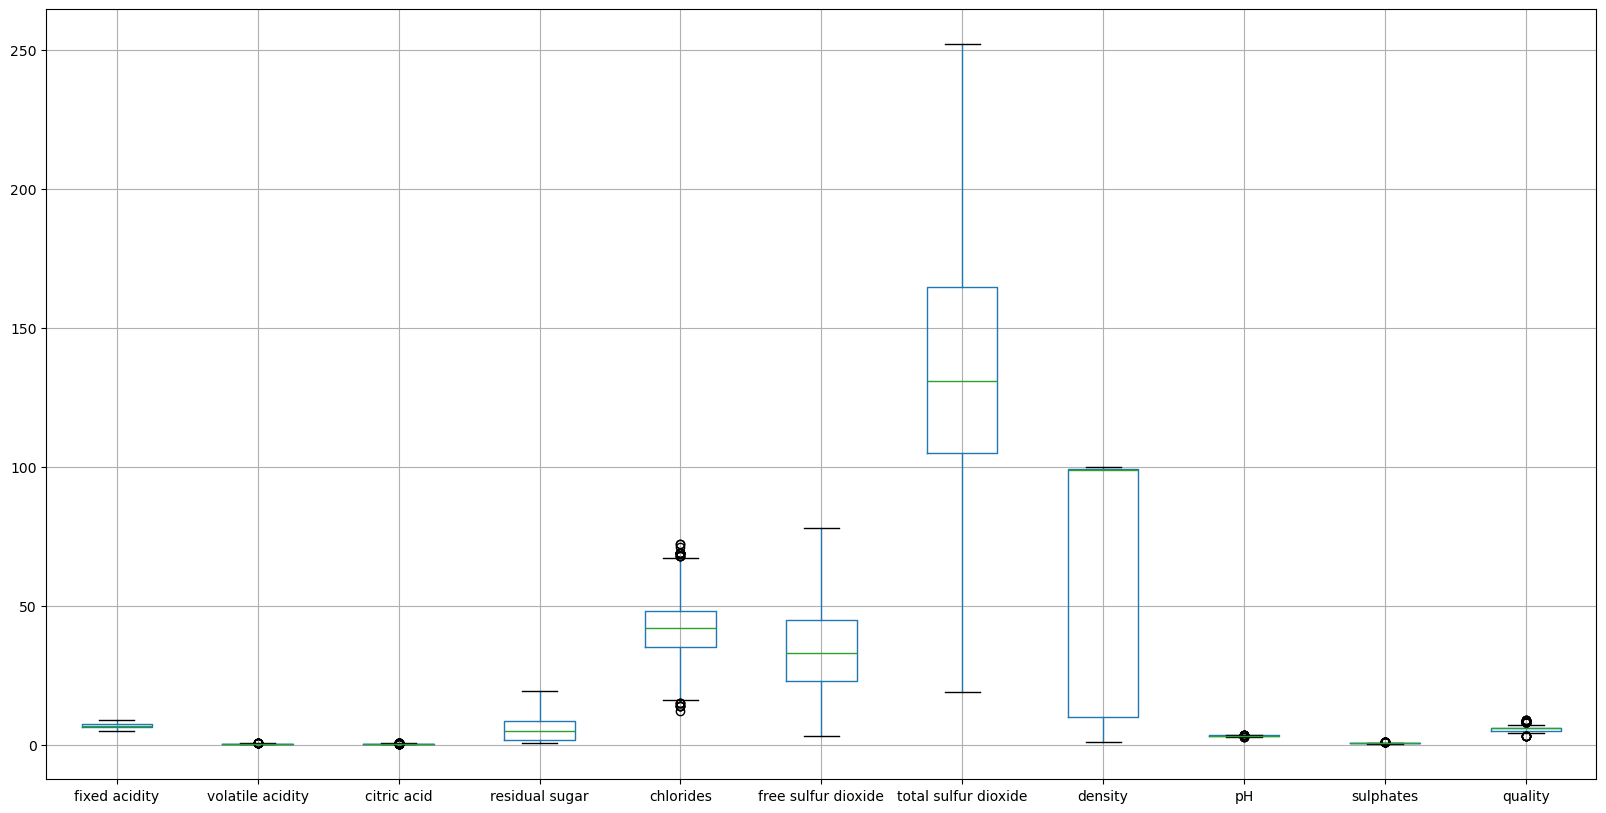

In [19]:
for atributo in datasetArrumado.columns[:-1]:

    q75, q25 = np.percentile(datasetArrumado[atributo].values, [75 ,25])
    IQR = q75 - q25

    datasetArrumado = datasetArrumado[ (datasetArrumado[atributo]<=(q75+1.5*IQR)) & (datasetArrumado[atributo]>=(q25-1.5*IQR)) ]
    

datasetArrumado.boxplot(figsize=(20,10))
plt.show()